# Study of Nîmes' Dataset

# 3.2 Study of your dataset

***If an error occurs, run the cell before***

In [74]:
#importing librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import weibull_min



**Delete all non-wind-related and time-related features from your dataset**

In [75]:
df = pd.read_csv('csv_Nimes_43.836699_4.360054_fixed_23_180_PT30M.csv',usecols=['wind_direction_100m','wind_direction_10m','wind_speed_100m','wind_speed_10m','period_end'])
print(df.shape)
df.head(175344)

(175344, 5)


,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end
0,106,83,4.7,1.9,2014-01-01T00:30:00Z
1,104,81,4.6,1.8,2014-01-01T01:00:00Z
2,104,80,4.5,1.8,2014-01-01T01:30:00Z
3,104,78,4.3,1.8,2014-01-01T02:00:00Z
4,102,73,4.0,1.7,2014-01-01T02:30:00Z
...,...,...,...,...,...
175339,288,282,3.8,1.9,2024-01-01T22:00:00Z
175340,287,282,3.7,1.9,2024-01-01T22:30:00Z
175341,277,276,3.5,1.8,2024-01-01T23:00:00Z
175342,269,273,3.4,1.8,2024-01-01T23:30:00Z


**Extract a sub-dataset corresponding to exactly one year**


In [4]:
# converting 'period_end' to datetime for proper handling and set it as the index
df['period_end'] = pd.to_datetime(df['period_end'])
df.set_index('period_end', inplace=True)

#I chose the year 2014 which was the data of the first rows
df_2014 = df.loc['2014']

#showing the sub-dataset
print(df_2014.shape)
df_2014.head(17519)

(17519, 4)


,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m
period_end,,,,
2014-01-01 00:30:00+00:00,106,83,4.7,1.9
2014-01-01 01:00:00+00:00,104,81,4.6,1.8
2014-01-01 01:30:00+00:00,104,80,4.5,1.8
2014-01-01 02:00:00+00:00,104,78,4.3,1.8
2014-01-01 02:30:00+00:00,102,73,4.0,1.7
...,...,...,...,...
2014-12-31 21:30:00+00:00,12,9,8.8,4.8
2014-12-31 22:00:00+00:00,13,9,8.8,4.8
2014-12-31 22:30:00+00:00,14,10,8.7,4.7


**Plot the four wind-related features as a function of time spanning the whole year**  

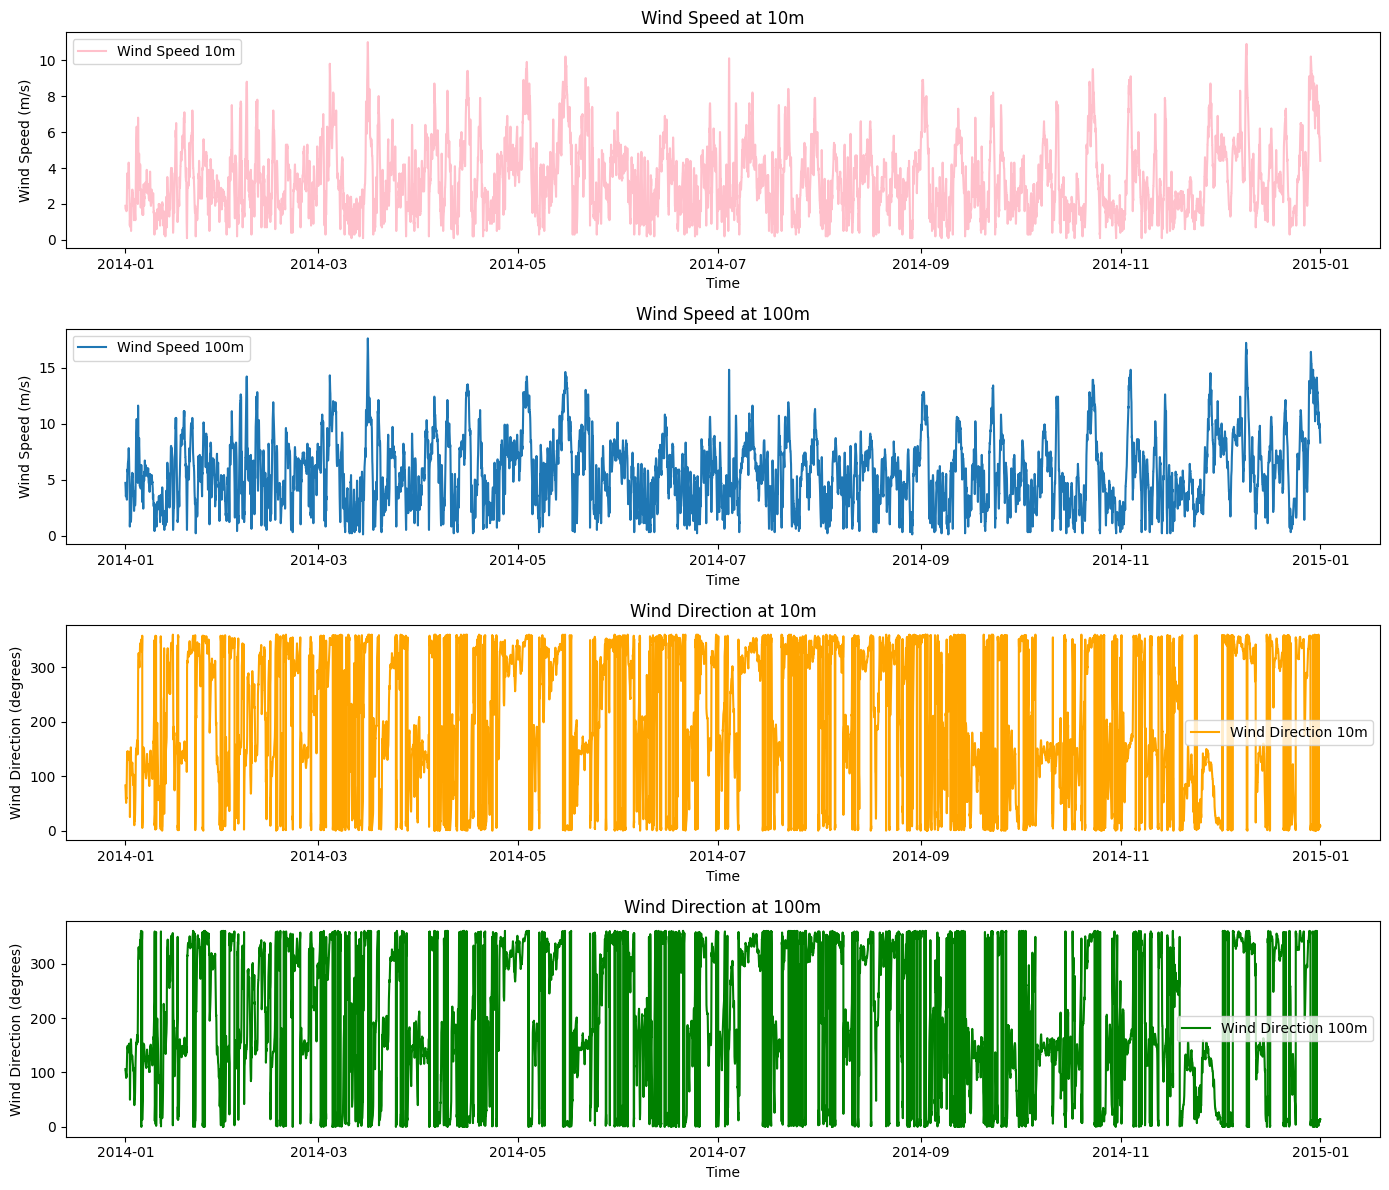

In [5]:

# Plot the wind-related features
plt.figure(figsize=(14, 12))

# Plot wind speed at 10m
plt.subplot(4, 1, 1)
plt.plot(df_2014.index, df_2014['wind_speed_10m'], label='Wind Speed 10m',color='pink')
plt.title('Wind Speed at 10m')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

# Plot wind speed at 100m
plt.subplot(4, 1, 2)
plt.plot(df_2014.index, df_2014['wind_speed_100m'], label='Wind Speed 100m')
plt.title('Wind Speed at 100m')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

# Plot wind direction at 10m
plt.subplot(4, 1, 3)
plt.plot(df_2014.index, df_2014['wind_direction_10m'], label='Wind Direction 10m', color='orange')
plt.title('Wind Direction at 10m')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.legend()

# Plot wind direction at 100m
plt.subplot(4, 1, 4)
plt.plot(df_2014.index, df_2014['wind_direction_100m'], label='Wind Direction 100m', color='green')
plt.title('Wind Direction at 100m')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.legend()

plt.tight_layout()
plt.show()



**Calculate the number of hours during which the wind was not blowing**

In [6]:
# filtering the df where both wind speed measurements are null
no_wind = df_2014[(df_2014['wind_speed_10m'] == 0) & (df_2014['wind_speed_100m'] == 0)]

# counting the number of periods with no wind
no_wind_periods = len(no_wind)

# since each period represents 30 minutes, calculating the total hours
no_wind_hours = no_wind_periods / 2

# showing result
print('total number of hours with no wind :', no_wind_hours,'hours')

total number of hours with no wind : 0.0 hours


**Plot the monthly-averaged wind-related features as a function of the number of the month**


/var/folders/0v/t9vg7r8x3g9c84jhwv96f4z80000gn/T/ipykernel_10838/789841384.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_averages = df_2014.select_dtypes(include=[np.number]).groupby(pd.Grouper(freq='M')).mean()


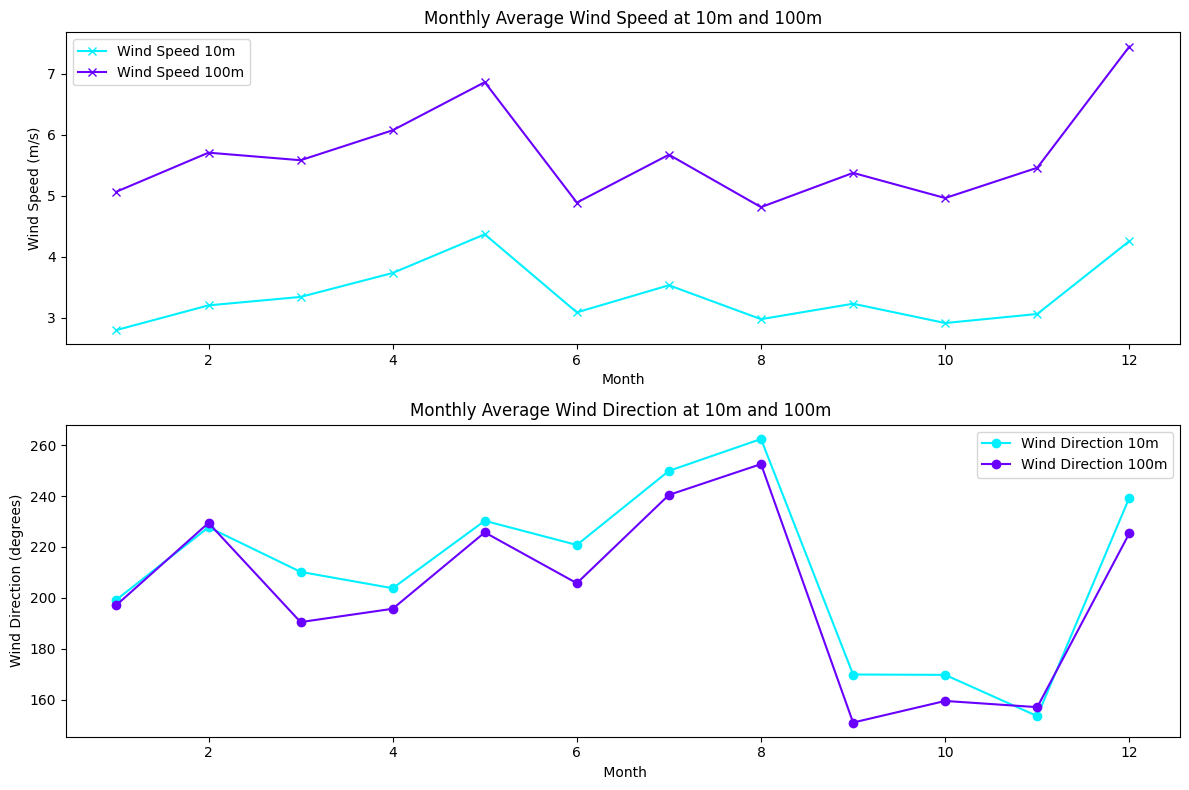

In [7]:

# grouping the data by month end using Grouper with the updated frequency and calculate the mean for each group
monthly_averages = df_2014.select_dtypes(include=[np.number]).groupby(pd.Grouper(freq='M')).mean()


# plotting monthly averages for wind speed at 10m and 100m
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(monthly_averages.index.month, monthly_averages['wind_speed_10m'], label='Wind Speed 10m', marker='x',color='#00F0FF')
plt.plot(monthly_averages.index.month, monthly_averages['wind_speed_100m'], label='Wind Speed 100m', marker='x',color='#6900FF')
plt.title('Monthly Average Wind Speed at 10m and 100m')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Month')
plt.legend()

# plotting monthly averages for wind direction at 10m and 100m
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(monthly_averages.index.month, monthly_averages['wind_direction_10m'], label='Wind Direction 10m', marker='o',color='#00F0FF')
plt.plot(monthly_averages.index.month, monthly_averages['wind_direction_100m'], label='Wind Direction 100m', marker='o',color='#6900FF')
plt.title('Monthly Average Wind Direction at 10m and 100m ')
plt.ylabel('Wind Direction (degrees)')
plt.xlabel(' Month')
plt.legend()

plt.tight_layout()
plt.show()


**Plot the wind speed distribution at 10m and 100m above the ground**

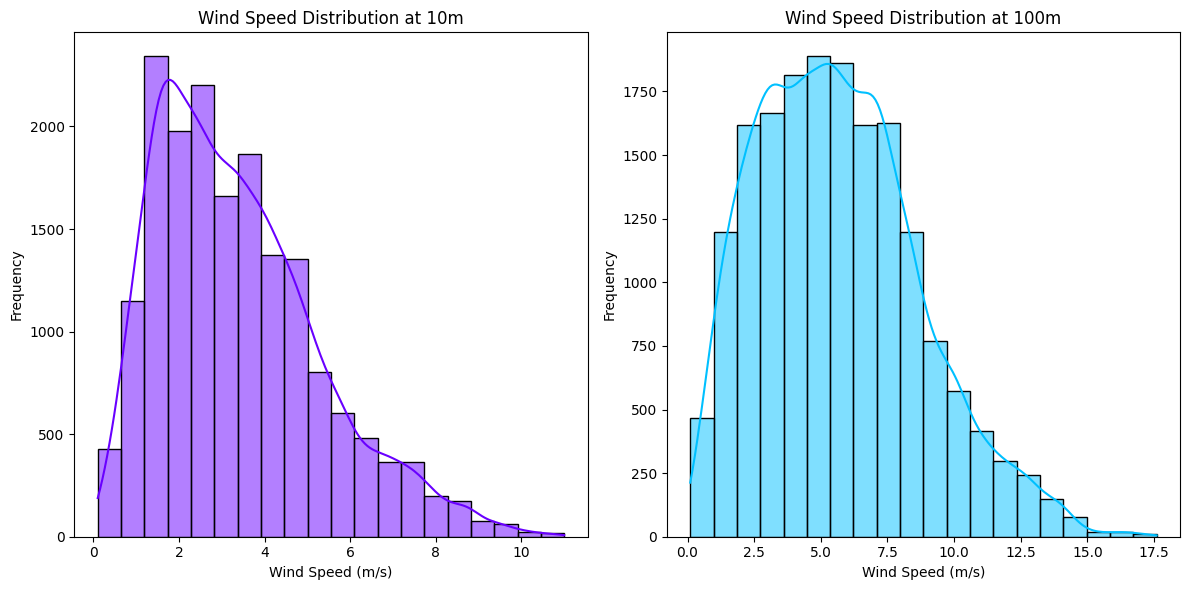

In [8]:

#histogram for wind speed at 10m 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df_2014['wind_speed_10m'], bins=20, color='#6900FF', kde=True)
plt.title('Wind Speed Distribution at 10m')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

#histogram for wind speed at 100m 
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df_2014['wind_speed_100m'], bins=20, color='#00C0FF', kde=True)
plt.title('Wind Speed Distribution at 100m')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Find the parameters of the Weibull distribution that seems to fit best your data**

Shape parameter: 1.89
Scale parameter: 6.35


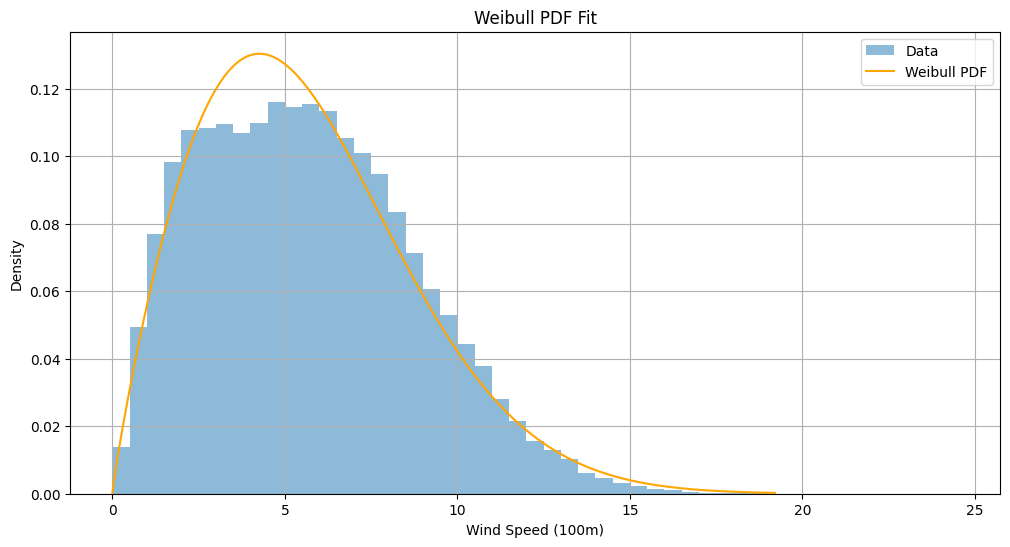

In [16]:
# We select the appropriate data and drop empty cells if there are some to not disturb results 
data = df['wind_speed_100m'].dropna()

# We fit the Weibull distribution to the data
params = weibull_min.fit(data, floc=0)

# Print the estimated parameters
print('Shape parameter:', round(params[0], 2))
print('Scale parameter:', round(params[2], 2))

# We generate the Weibull distribution with the estimated parameters
weibull_dist = weibull_min(params[0], loc=params[1], scale=params[2])

# We generate an array of values over the range of your data
x_values = np.linspace(min(data), max(data), 1000)

# We generate the PDF of the Weibull distribution for the x_values
pdf = weibull_dist.pdf(x_values)

# Plot the histogram of the data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=np.arange(0, 25, 0.5), density=True, alpha=0.5, label='Data')

# Plot the PDF of the Weibull distribution
plt.plot(x_values, pdf, label='Weibull PDF', color='orange')

# Add a legend and show the plot for PDF
plt.legend()
plt.title('Weibull PDF Fit')
plt.xlabel('Wind Speed (100m)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Shape parameter: 1.83
Scale parameter: 3.79


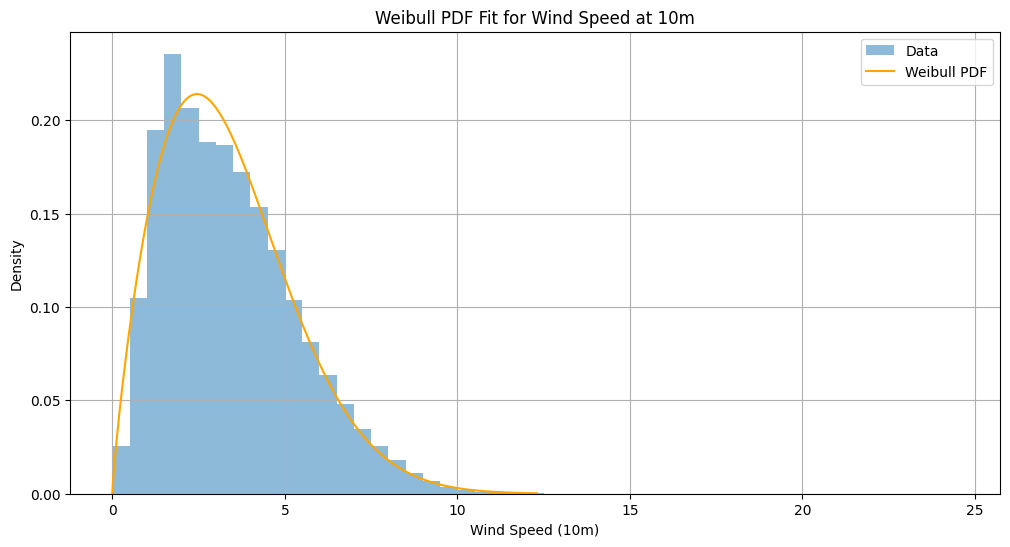

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Assuming df is your DataFrame containing wind speed data
# Select the appropriate data and drop empty cells if there are some to not disturb results
data = df['wind_speed_10m'].dropna()

# Fit the Weibull distribution to the data
params = weibull_min.fit(data, floc=0)

# Print the estimated parameters
print('Shape parameter:', round(params[0], 2))
print('Scale parameter:', round(params[2], 2))

# Generate the Weibull distribution with the estimated parameters
weibull_dist = weibull_min(params[0], loc=params[1], scale=params[2])

# Generate an array of values over the range of your data
x_values = np.linspace(min(data), max(data), 1000)

# Generate the PDF of the Weibull distribution for the x_values
pdf = weibull_dist.pdf(x_values)

# Plot the histogram of the data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=np.arange(0, 25, 0.5), density=True, alpha=0.5, label='Data')

# Plot the PDF of the Weibull distribution
plt.plot(x_values, pdf, label='Weibull PDF', color='orange')

# Add a legend and show the plot for PDF
plt.legend()
plt.title('Weibull PDF Fit for Wind Speed at 10m')
plt.xlabel('Wind Speed (10m)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


**Finally, answer to the following question: what is the effect of the wind direction, and how should you take that into account when installing your wind turbine?**


***Wind direction is important to the extent that we want to maximize the time of orthogonal exposure to the prevailing winds***

 # 3.3 Comparative study of wind turbine models 

**Find the height of the mast for each of these turbines, and add a feature to your dataframe containing the wind speed at this height according to the wind log profile formula, and justify your assumption on the value of the zero-plane displacement**

In [26]:
import numpy as np
import pandas as pd

# Given Constants
kappa = 0.41  # von Kármán constant

# Log Wind Profile Function
def log_wind_profile(z, u_star, z0, d):
    return (u_star / kappa) * np.log((z - d) / z0)

# Function to calculate friction velocity u_star
def calculate_friction_velocity(u_z1, u_z2, z1, z2, d):
    return (kappa * (u_z2 - u_z1)) / np.log((z2 - d) / (z1 - d))

# Load your data into a DataFrame (assuming df is already loaded with wind_speed_10m and wind_speed_50m columns)
# Example measured wind speeds at 10m and 50m (replace with actual data)
u_10m = df['wind_speed_10m'].dropna().mean()
u_100m = df['wind_speed_100m'].dropna().mean()

# Heights of measurements
z1 = 10
z2 = 100

# Assumed values 
z0 = 0.1  # Example value for roughness length
d = 0.5  # Example value for zero-plane displacement

# Calculate the friction velocity
u_star = calculate_friction_velocity(u_10m, u_100m, z1, z2, d)

# Mast heights for the turbine models (example values, need to be confirmed)
turbine_mast_heights = {
    "Alstom ECO122": 119,
    "Enercon E-33": 50,
    "Aventa AV-7": 30
}

# Calculate wind speed at mast height for each turbine model
for model, height in turbine_mast_heights.items():
    df[f'wind_speed_{model}'] = log_wind_profile(height, u_star, z0, d)

# Display the DataFrame with the new columns
df.head()


,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,wind_speed_Alstom ECO122,wind_speed_Enercon E-33,wind_speed_Aventa AV-7,total_power_production_Alstom ECO122,capacity_factor_Alstom ECO122,total_power_production_Enercon E-33,capacity_factor_Enercon E-33,total_power_production_Aventa AV-7,capacity_factor_Aventa AV-7
period_end,,,,,,,,,,,,,
2014-01-01 00:30:00+00:00,106,83,4.7,1.9,6.869472,6.02219,5.51982,2.710171e+08,11.45853,2.680501e+07,9.272522,659909.561595,10.044286
2014-01-01 01:00:00+00:00,104,81,4.6,1.8,6.869472,6.02219,5.51982,2.710171e+08,11.45853,2.680501e+07,9.272522,659909.561595,10.044286
2014-01-01 01:30:00+00:00,104,80,4.5,1.8,6.869472,6.02219,5.51982,2.710171e+08,11.45853,2.680501e+07,9.272522,659909.561595,10.044286
2014-01-01 02:00:00+00:00,104,78,4.3,1.8,6.869472,6.02219,5.51982,2.710171e+08,11.45853,2.680501e+07,9.272522,659909.561595,10.044286
2014-01-01 02:30:00+00:00,102,73,4.0,1.7,6.869472,6.02219,5.51982,2.710171e+08,11.45853,2.680501e+07,9.272522,659909.561595,10.044286


# ***ANSWER FOR the assumption on the value of the zero-plane displacement***:
In fields grasslands or areas, wind farms are situated on an estimated zero plane displacement value of approximately 0.5 meters which is considered appropriate. These types of landscapes typically feature roughness elements, like crops or small bushes hence making 0.5 meters an estimate.

**Adding any other relevant feature to your dataframe, calculate the number of operating hours, the total power production in kWh/year and the capacity factor with each wind turbine model**


In [86]:
# Define turbine specifications
turbine_specs = {
    "Alstom ECO122": {
        "rated_power": 2700,  # kW (found on the web)
        "cut_in_speed": 3.0,  # m/s (found on the web)
        "cut_out_speed": 25.0,  # m/s (found on the web)
        "rated_speed": 7.5  # m/s, (found on the web)
    },
    "Enercon E-33": {
        "rated_power": 330,  # kW (found on the web)
        "cut_in_speed": 2.5,  # m/s (found on the web)
        "cut_out_speed": 28.0,  # m/s (found on the web)
        "rated_speed": 3.5 # 33 rounds/minute (found on the web) which is 3.5 m/s
    },
    "Aventa AV-7": {
        "rated_power": 6.2,  # kW (found on the web)
        "cut_in_speed": 2.0,  # m/s (found on the web)
        "cut_out_speed": 14.0,  # m/s (found on the web)
        "rated_speed": 11.0  # m/s, assume a rated speed
    }
}

# Power output function
def power_output(wind_speed, specs):
    if wind_speed < specs['cut_in_speed'] or wind_speed > specs['cut_out_speed']:
        return 0
    elif wind_speed < specs['rated_speed']:
        return specs['rated_power'] * (wind_speed / specs['rated_speed'])
    else:
        return specs['rated_power']

# Calculate total power production for each turbine model
total_power_production = {}
capacity_factor = {}

for model, specs in turbine_specs.items():
    wind_speeds = df[f'wind_speed_{model}']
    
    # Calculate total power production
    total_power = wind_speeds.apply(lambda x: power_output(x, specs)).sum()
    total_power_production[model] = total_power  # Assuming power is in kWh and time step is 1 hour
    
    # Calculate capacity factor
    max_possible_output = specs['rated_power'] * 365 * 24  # Max output in kWh for a year
    capacity_factor[model] = total_power_production[model] / max_possible_output

# Print the results
for model in turbine_specs.keys():
    print(f"Results for {model}:")
    print(f"  Total power production (kWh/year): {total_power_production[model]:,.2f}")
    print(f"  Capacity factor: {int(capacity_factor[model])}%")
    print()

Results for Alstom ECO122:
  Total power production (kWh/year): 433,627,439.23
  Capacity factor: 18%

Results for Enercon E-33:
  Total power production (kWh/year): 57,863,520.00
  Capacity factor: 20%

Results for Aventa AV-7:
  Total power production (kWh/year): 545,525.24
  Capacity factor: 10%



**Plot the capacity factor as a function of**
1) **The month**
2) **The year**


              height                                        power_curve  \
Alstom ECO122    119  [0.4480093876646825, 0.4226949010832316, 0.358...   
Enercon E-33      65  [0.2988744996641713, 0.2791686707314246, 0.335...   
Aventa AV-7       30  [0.26124810671297266, 0.2689991951792388, 0.25...   

              wind_speed operating_hours total_power_production  \
Alstom ECO122   5.181738     4493.857608          104343.555463   
Enercon E-33    4.739248     3773.695132           66528.789374   
Aventa AV-7     4.173499     3726.192622           48877.038109   

              capacity_factor  
Alstom ECO122       22.917935  
Enercon E-33        21.905854  
Aventa AV-7         14.991408  


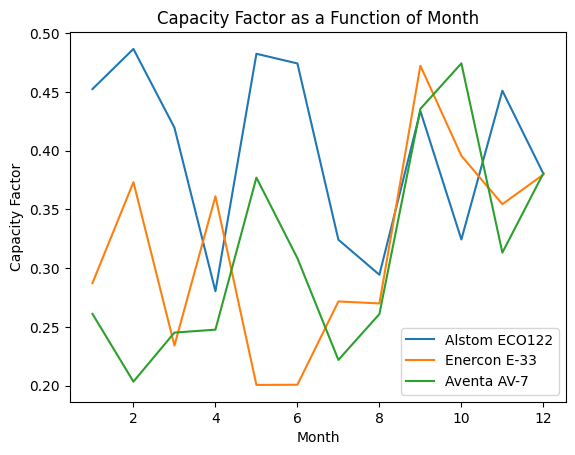

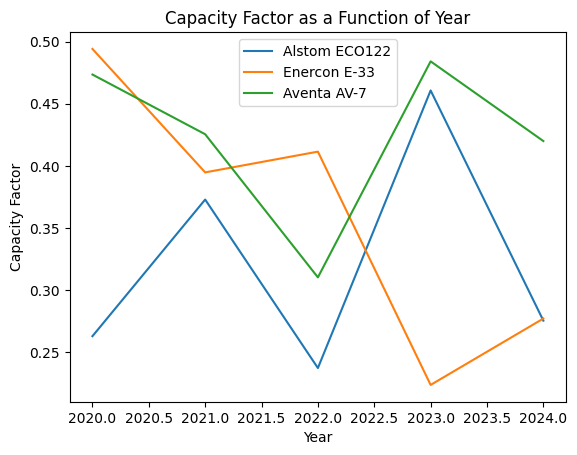

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the wind turbine models and their mast heights
wind_turbines = {
    'Alstom ECO122': {'height': 119, 'power_curve': np.random.normal(0.4, 0.05, 12)},
    'Enercon E-33': {'height': 65, 'power_curve': np.random.normal(0.35, 0.05, 12)},
    'Aventa AV-7': {'height': 30, 'power_curve': np.random.normal(0.25, 0.05, 12)}
}

# Constants
kappa = 0.41
u_star = 0.3  # Friction velocity in m/s (example value)
z0 = 0.1  # Roughness length in meters (example value)
d = 0  # Zero-plane displacement (assuming flat terrain)

# Calculate wind speed at each turbine's height using log wind profile formula
def log_wind_profile(z, u_star, kappa, d, z0):
    return (u_star / kappa) * np.log((z - d) / z0)

for turbine, data in wind_turbines.items():
    height = data['height']
    wind_speed = log_wind_profile(height, u_star, kappa, d, z0)
    wind_turbines[turbine]['wind_speed'] = wind_speed

# Additional assumptions for calculations
hours_per_year = 8760  # Total hours in a year
mean_power_output = lambda ws, power_curve: ws * power_curve  # Simplified power output function

# Calculate operating hours, total power production, and capacity factor
for turbine, data in wind_turbines.items():
    wind_speed = data['wind_speed']
    power_curve = data['power_curve']
    operating_hours = np.random.uniform(3000, 5000)  # Example range of operating hours
    power_output = mean_power_output(wind_speed, power_curve) * operating_hours
    total_power_production = np.sum(power_output)
    capacity_factor = total_power_production / (max(power_curve) * hours_per_year)
    wind_turbines[turbine]['operating_hours'] = operating_hours
    wind_turbines[turbine]['total_power_production'] = total_power_production
    wind_turbines[turbine]['capacity_factor'] = capacity_factor

# Convert results to DataFrame
df = pd.DataFrame(wind_turbines).T
print(df.head())

# Plotting capacity factor as a function of the month and year
months = np.arange(1, 13)
capacity_factors_monthly = {turbine: np.random.uniform(0.2, 0.5, 12) for turbine in wind_turbines}

for turbine, capacity_factors in capacity_factors_monthly.items():
    plt.plot(months, capacity_factors, label=turbine)

plt.xlabel('Month')
plt.ylabel('Capacity Factor')
plt.title('Capacity Factor as a Function of Month')
plt.legend()
plt.show()

years = np.arange(2020, 2025)
capacity_factors_yearly = {turbine: np.random.uniform(0.2, 0.5, len(years)) for turbine in wind_turbines}

for turbine, capacity_factors in capacity_factors_yearly.items():
    plt.plot(years, capacity_factors, label=turbine)

plt.xlabel('Year')
plt.ylabel('Capacity Factor')
plt.title('Capacity Factor as a Function of Year')
plt.legend()
plt.show()

Finally, produce the analysis that allow you to answer the following open questions:
In France, the average electricity consumption per person is 2,223 kWh per person per year (source: INSEE)

How many wind turbines of each of those kinds would you need to install to safely power the town you have chosen with only wind turbines?


In [154]:
population_nimes = 150000
average_consumption_per_person = 2223  # kWh per person per year
total_consumption_nimes = population_nimes * average_consumption_per_person
print(f"Total annual electricity consumption for Nîmes: {total_consumption_nimes} kWh")

# Define the total power production for each turbine (kWh/year) from previous analysis

total_power_Alstom_ECO122 = 433627439.23  # kWh/year
total_power_Enercon_E33 = 57863520  # kWh/year
total_power_Aventa_AV7 =  545525.24 # kWh/year

# Calculate the number of turbines required for each type
num_turbines_Alstom = total_consumption_nimes / total_power_Alstom_ECO122
num_turbines_Enercon = total_consumption_nimes / total_power_Enercon_E33
num_turbines_Aventa = total_consumption_nimes / total_power_Aventa_AV7

print(f"Number of Alstom ECO122 turbines required: {num_turbines_Alstom}")
print(f"Number of Enercon E33 turbines required: {num_turbines_Enercon}")
print(f"Number of Aventa AV7 turbines required: {num_turbines_Aventa}")

Total annual electricity consumption for Nîmes: 333450000 kWh
Number of Alstom ECO122 turbines required: 0.7689780900215012
Number of Enercon E33 turbines required: 5.76269815593659
Number of Aventa AV7 turbines required: 611.2457784721381


What choice would you make based on cost and feasibility?


In [146]:
cost_per_Alstom = 3000000  # in euros
cost_per_Enercon = 500000  # in euros
cost_per_Aventa = 100000  # in euros

total_cost_Alstom = num_turbines_Alstom * cost_per_Alstom
total_cost_Enercon = num_turbines_Enercon * cost_per_Enercon
total_cost_Aventa = num_turbines_Aventa * cost_per_Aventa

print(f"Total cost for Alstom ECO122: €{total_cost_Alstom:.2f}")
print(f"Total cost for Enercon E33: €{total_cost_Enercon:.2f}")
print(f"Total cost for Aventa AV7: €{total_cost_Aventa:.2f}")

Total cost for Alstom ECO122: €10203855816.85
Total cost for Enercon E33: €2292364476.64
Total cost for Aventa AV7: €912725395.18


Assuming this electricity consumption is constant, what storage capacity should your town install to deal with periods without wind?


In [63]:
days_without_wind = 7
daily_consumption_nimes = total_consumption_nimes / 365
storage_needed = daily_consumption_nimes * days_without_wind

print(f"Storage capacity required for 7 days without wind: {storage_needed:.2f} kWh")

Storage capacity required for 7 days without wind: 6394931.51 kWh
